In [142]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
import shap


In [143]:
#Load the data

# Load the data
df = pd.read_csv('../data/customer_churn.csv')

# Display the first few rows and data info
print(df.head())
print(df.info())


              Names   Age  Total_Purchase  Account_Manager  Years  Num_Sites  \
0  Cameron Williams  42.0        11066.80                0   7.22        8.0   
1     Kevin Mueller  41.0        11916.22                0   6.50       11.0   
2       Eric Lozano  38.0        12884.75                0   6.67       12.0   
3     Phillip White  42.0         8010.76                0   6.71       10.0   
4    Cynthia Norton  37.0         9191.58                0   5.56        9.0   

          Onboard_date                                           Location  \
0  2013-08-30 07:00:40      10265 Elizabeth Mission Barkerburgh, AK 89518   
1  2013-08-13 00:38:46  6157 Frank Gardens Suite 019 Carloshaven, RI 1...   
2  2016-06-29 06:20:07             1331 Keith Court Alyssahaven, DE 90114   
3  2014-04-22 12:43:12       13120 Daniel Mount Angelabury, WY 30645-4695   
4  2016-01-19 15:31:15                765 Tricia Row Karenshire, MH 71730   

                       Company  Churn  
0               

>Exploratory Data Analysis

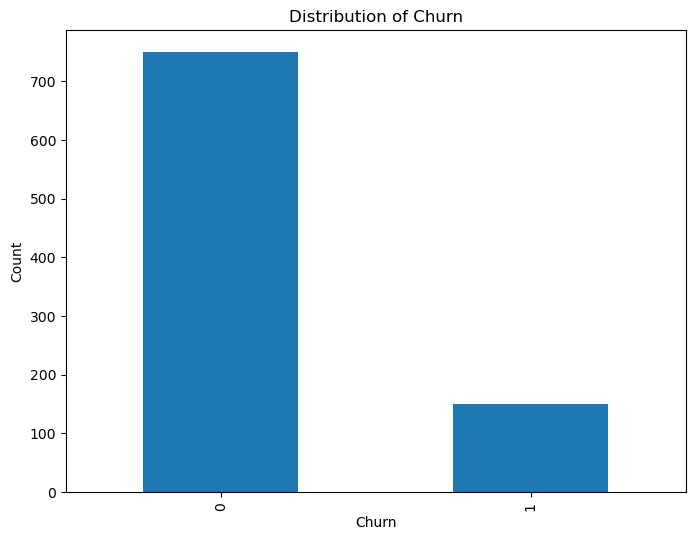

In [144]:
#Analyze the distribution of the target variable:

# Construct the path to the output directory relative to the data directory
output_dir = '../output'

plt.figure(figsize=(8, 6))
df['Churn'].value_counts().plot(kind='bar')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')

# Save the plot to the output directory
output_path = os.path.join(output_dir, 'Distribution_of_Churn.png')
plt.savefig(output_path)

# Show the plot
plt.show()

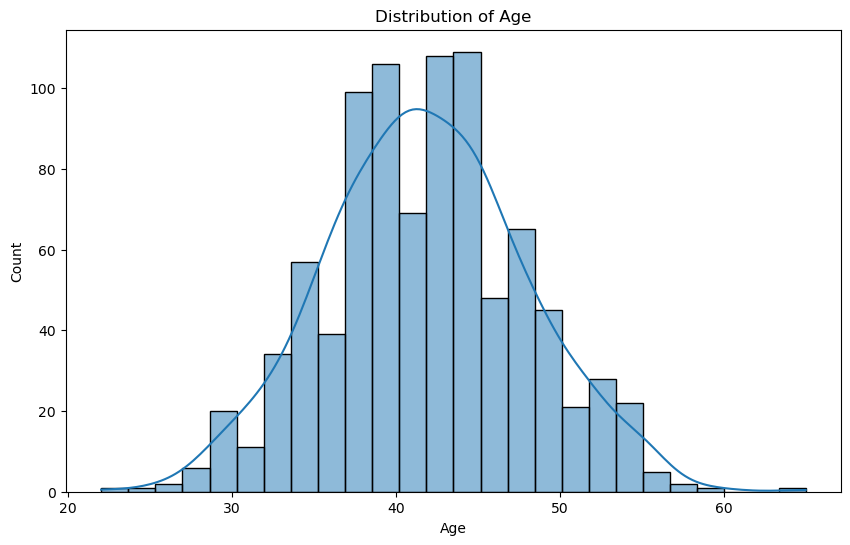

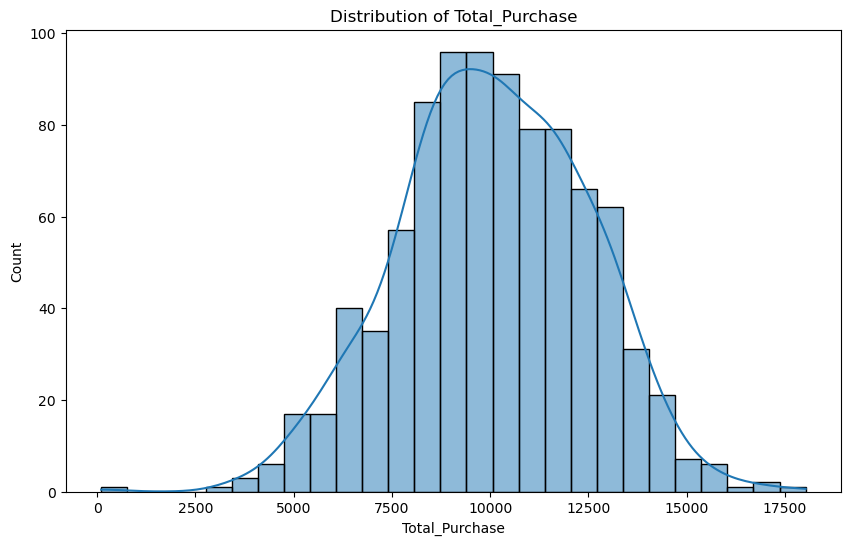

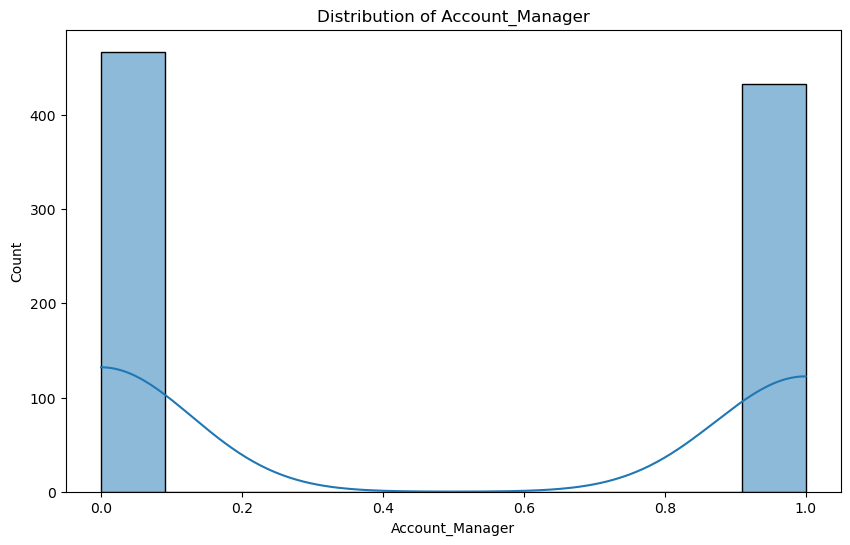

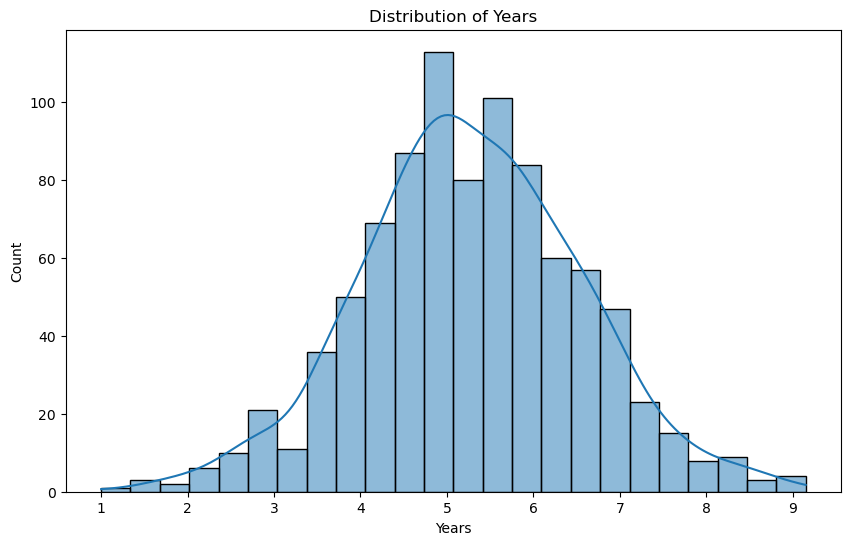

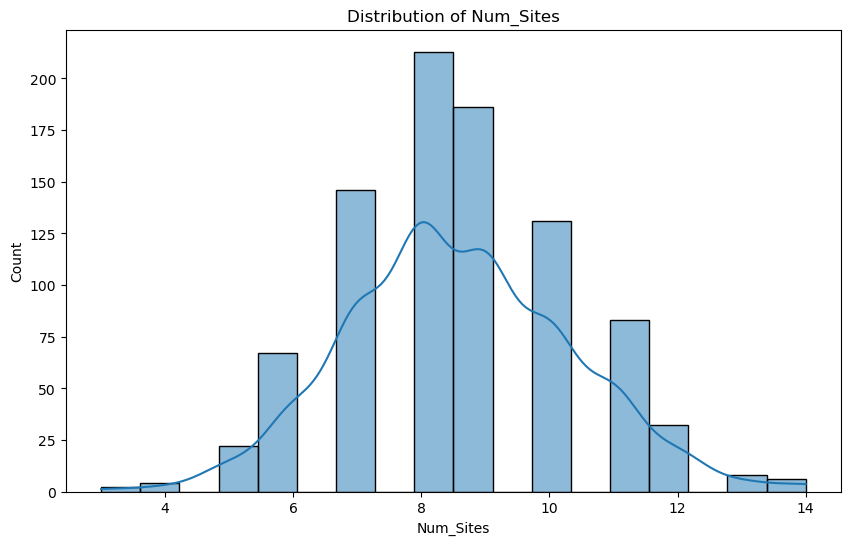

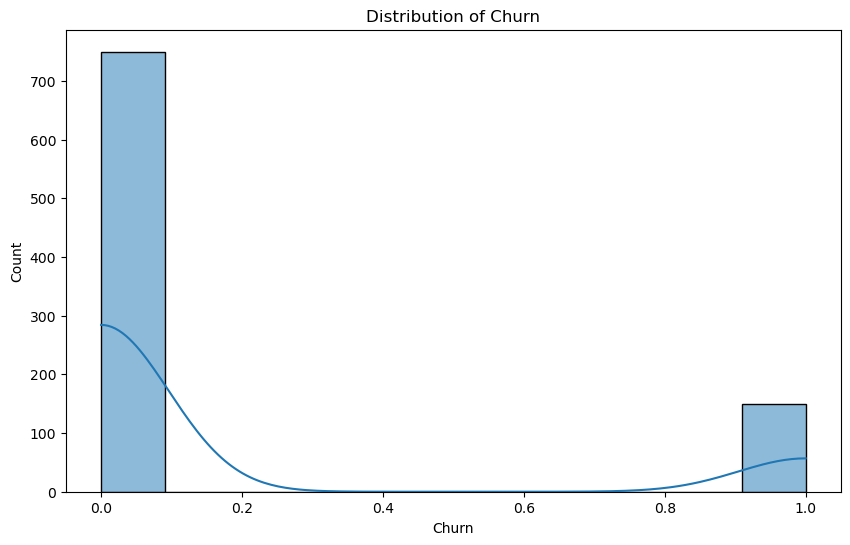

In [146]:
#Explore numerical features:

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    
    # Save the plot to the output directory
    output_path = os.path.join(output_dir, f'Distribution_of_{feature}.png')
    plt.savefig(output_path)



# Code to Explore categorical features if applicable:

categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

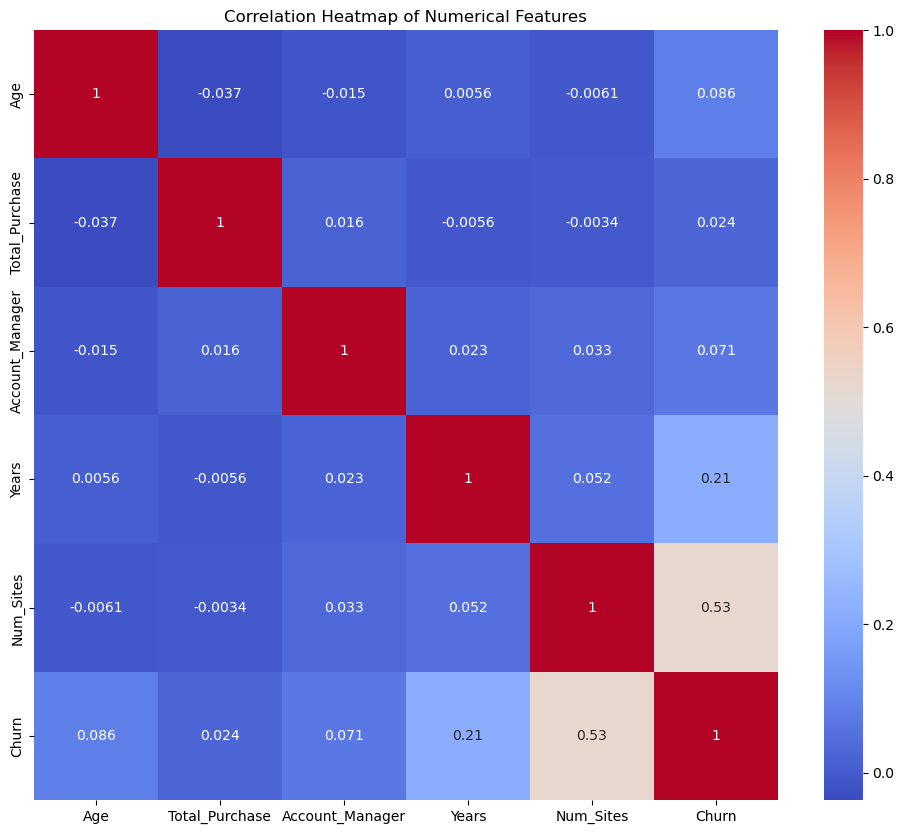

In [147]:
#Analyze correlations between numerical features:

plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')

# Save the plot to the output directory
output_path = os.path.join(output_dir, 'Correlation_Heatmap')
plt.savefig(output_path)


>Data Processing

In [59]:
# Convert the Onboard_date feature to datetime

# Convert 'Onboard_date' to datetime
df['Onboard_date'] = pd.to_datetime(df['Onboard_date'])

# Verify the conversion
print(df['Onboard_date'].dtype)
print(df['Onboard_date'].head())

datetime64[ns]
0   2013-08-30 07:00:40
1   2013-08-13 00:38:46
2   2016-06-29 06:20:07
3   2014-04-22 12:43:12
4   2016-01-19 15:31:15
Name: Onboard_date, dtype: datetime64[ns]


In [60]:
# Handle missing values:

# Check for missing values
print(df.isnull().sum())

# If there are missing values, you can either drop them or impute them
# For this example, we'll drop them
df = df.dropna()


Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
dtype: int64


In [64]:
categorical_features

Index(['Names', 'Onboard_date', 'Location', 'Company'], dtype='object')

In [65]:
#Encode categorical variables:

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_features)


In [66]:
#Normalize numerical features:

scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])


In [67]:
df_encoded.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn,Names_Aaron King,Names_Aaron Meyer,Names_Aaron West,Names_Abigail Gonzalez,...,"Company_Yates, Martinez and Cox",Company_Young and Sons,"Company_Young, Porter and Hill",Company_Young-Dunn,Company_Young-Newman,Company_Yu-Murillo,Company_Zamora-Cherry,Company_Zhang-Brown,Company_Zimmerman Group,"Company_Zuniga, Clark and Shaffer"
0,0.029936,0.417054,-0.96291,1.528446,-0.333235,2.236068,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.133352,0.769905,-0.96291,0.963182,1.367585,2.236068,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.623215,1.172234,-0.96291,1.096647,1.934526,2.236068,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.029936,-0.852432,-0.96291,1.128051,0.800645,2.236068,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.786503,-0.361917,-0.96291,0.225198,0.233705,2.236068,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


>Feature Engineering

In [69]:
#Create new Features:

# Create a feature for customer lifetime value
df_encoded['Customer_Lifetime_Value'] = df_encoded['Total_Purchase'] * df_encoded['Years']

# Create a feature for average purchase per year
df_encoded['Avg_Purchase_Per_Year'] = df_encoded['Total_Purchase'] / df_encoded['Years']


In [70]:
#Select important features:

# Use correlation with the target variable to select features
correlation_with_target = df_encoded.corr()['Churn'].abs().sort_values(ascending=False)
top_features = correlation_with_target[1:11].index.tolist()  # Top 10 features excluding 'Churn'

X = df_encoded[top_features]
y = df_encoded['Churn']


In [71]:
#Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
# Convert continuous target variable to binary classes
y_train_binary = (y_train > 0).astype(int)
y_test_binary = (y_test > 0).astype(int)

# Implement and train multiple models:

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train_binary)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train_binary)

# XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train_binary)

# Neural Network
nn_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train_binary, epochs=50, batch_size=32, validation_split=0.2, verbose=0)


c:\Users\Jason\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
# Evaluate the models:

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    if isinstance(model, keras.Sequential):
        y_pred = (y_pred > 0.5).astype(int)
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred)
    }

models = {
    'Logistic Regression': lr_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'Neural Network': nn_model
}

for name, model in models.items():
    print(f"{name} Performance:")
    print(evaluate_model(model, X_test, y_test_binary))
    print()


Logistic Regression Performance:
{'accuracy': 0.9055555555555556, 'precision': 0.8, 'recall': 0.625, 'f1': 0.7017543859649122, 'roc_auc': 0.7956081081081081}

Random Forest Performance:
{'accuracy': 0.8833333333333333, 'precision': 0.72, 'recall': 0.5625, 'f1': 0.631578947368421, 'roc_auc': 0.7576013513513514}

XGBoost Performance:
{'accuracy': 0.8833333333333333, 'precision': 0.72, 'recall': 0.5625, 'f1': 0.631578947368421, 'roc_auc': 0.7576013513513514}

Neural Network Performance:
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
{'accuracy': 0.8944444444444445, 'precision': 0.782608695652174, 'recall': 0.5625, 'f1': 0.6545454545454545, 'roc_auc': 0.7643581081081081}



In [74]:
# After evaluating all models, select the best one (Logistic Regression in this case)
best_model = lr_model

print("Best model (Logistic Regression) performance:")
print(evaluate_model(best_model, X_test, y_test_binary))

Best model (Logistic Regression) performance:
{'accuracy': 0.9055555555555556, 'precision': 0.8, 'recall': 0.625, 'f1': 0.7017543859649122, 'roc_auc': 0.7956081081081081}


>Model Interpretation

c:\Users\Jason\miniconda3\Lib\site-packages\shap\explainers\_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


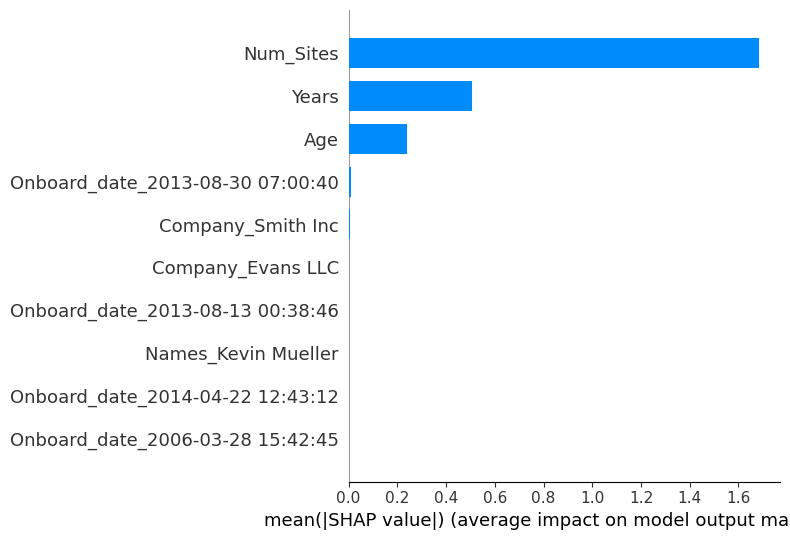

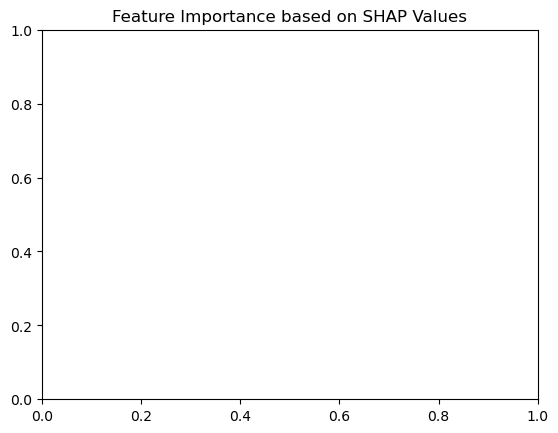

In [149]:
# Use SHAP values to interpret the best-performing model 

explainer = shap.LinearExplainer(best_model, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)

plt.figure(figsize=(20, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title('Feature Importance based on SHAP Values')

# Save the plot to the output directory
output_path = os.path.join(output_dir, 'Feature_Importance_SHAP.png')
plt.savefig(output_path)
plt.show()

>Hyperparameter Tuning

In [76]:
#Perform hyperparameter tuning for the best model 

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train_binary)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Use the best model
best_lr_model = grid_search.best_estimator_
print("Best model performance after tuning:")
print(evaluate_model(best_lr_model, X_test, y_test_binary))

c:\Users\Jason\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Jason\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Jason\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Jason\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Jason\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Jason\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max

Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score: 0.8944444444444445
Best model performance after tuning:
{'accuracy': 0.9, 'precision': 0.7916666666666666, 'recall': 0.59375, 'f1': 0.6785714285714286, 'roc_auc': 0.7799831081081081}


c:\Users\Jason\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Jason\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Jason\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Jason\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Jason\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


>Customer Segmentation

c:\Users\Jason\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Jason\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Jason\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Jason\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

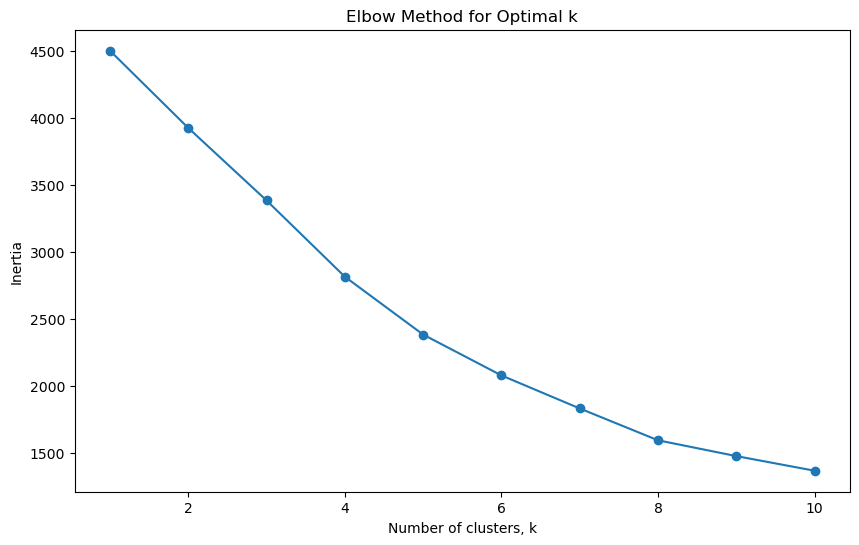

Cluster 0:
       Total_Purchase       Years   Num_Sites  Customer_Lifetime_Value  \
count      238.000000  238.000000  238.000000               238.000000   
mean         0.891139   -0.770083   -0.180780                -0.660739   
std          0.550859    0.695346    0.974893                 0.947407   
min         -0.245130   -3.354808   -3.167935                -6.112797   
25%          0.503370   -1.211515   -0.900175                -0.850424   
50%          0.865111   -0.591294   -0.333235                -0.369365   
75%          1.235216   -0.253706    0.233705                -0.134583   
max          3.307924    0.484278    3.068406                 0.822366   

       Avg_Purchase_Per_Year       Churn  
count             238.000000  238.000000  
mean               -7.793394   -0.266825  
std                52.993731    0.673349  
min              -556.759614   -0.447214  
25%                -2.743336   -0.447214  
50%                -1.208898   -0.447214  
75%                -0

c:\Users\Jason\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [150]:
#Implement K-means clustering:

# Select features for clustering
cluster_features = ['Total_Purchase', 'Years', 'Num_Sites', 'Customer_Lifetime_Value', 'Avg_Purchase_Per_Year']

# Normalize features
scaler = StandardScaler()
cluster_data = scaler.fit_transform(df_encoded[cluster_features])

# Determine optimal number of clusters using elbow method
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')

# Save the plot to the output directory
output_path = os.path.join(output_dir, 'Optimal_K.png')
plt.savefig(output_path)
plt.show()

# Choose optimal k and perform clustering
optimal_k = 3  # Choose based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(cluster_data)

# Analyze clusters
for i in range(optimal_k):
    cluster_data = df_encoded[df_encoded['Cluster'] == i]
    print(f"Cluster {i}:")
    print(cluster_data[cluster_features + ['Churn']].describe())
    print()


>Retention Strategy Development

In [154]:
#Create a function to recommend personalized retention actions:

def recommend_retention_action(customer_data):
    churn_prob = best_model.predict_proba(customer_data[top_features].values.reshape(1, -1))[0][1]
    
    if churn_prob > 0.7:
        if customer_data['Total_Purchase'] > 10000:
            return "High-risk, high-value customer. Offer premium features and personalized account management."
        elif customer_data['Years'] > 5:
            return "High-risk, long-term customer. Provide loyalty rewards and contract renewal incentives."
        else:
            return "High-risk customer. Offer targeted discounts and improved customer support."
    elif churn_prob > 0.4:
        if customer_data['Num_Sites'] > 10:
            return "Medium-risk customer with multiple sites. Offer multi-site discount packages."
        else:
            return "Medium-risk customer. Send satisfaction survey and offer moderate incentives."
    else:
        return "Low-risk customer. Maintain regular communication and offer small loyalty rewards."

# Example usage
example_customer = df_encoded.iloc[0]
print(recommend_retention_action(example_customer))



Low-risk customer. Maintain regular communication and offer small loyalty rewards.


c:\Users\Jason\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [155]:
#alternate approach with user selection input

def display_customers(df, num_customers=10):
    print("Available customers:")
    for i, (index, row) in enumerate(df.iterrows(), 1):
        print(f"{i}. {row['Names']} (Age: {row['Age']}, Total Purchase: ${row['Total_Purchase']:.2f})")
        if i == num_customers:
            break

def get_user_selection(df, num_customers=10):
    while True:
        try:
            selection = int(input(f"Enter a number between 1 and {num_customers} to select a customer: "))
            if 1 <= selection <= num_customers:
                return df.iloc[selection - 1]
            else:
                print(f"Please enter a valid number between 1 and {num_customers}.")
        except ValueError:
            print("Please enter a valid number.")

# Ensure 'Names' column is included in df_encoded
df_encoded['Names'] = df['Names']

# Display the first 10 customers
display_customers(df)

# Add a line space before displaying the selected customer
print()

# Get user selection
selected_customer = get_user_selection(df_encoded)

# Use the selected customer for recommendation
print("Selected Customer:", selected_customer['Names'])
print(recommend_retention_action(selected_customer))


Available customers:
1. Cameron Williams (Age: 42.0, Total Purchase: $11066.80)
2. Kevin Mueller (Age: 41.0, Total Purchase: $11916.22)
3. Eric Lozano (Age: 38.0, Total Purchase: $12884.75)
4. Phillip White (Age: 42.0, Total Purchase: $8010.76)
5. Cynthia Norton (Age: 37.0, Total Purchase: $9191.58)
6. Jessica Williams (Age: 48.0, Total Purchase: $10356.02)
7. Eric Butler (Age: 44.0, Total Purchase: $11331.58)
8. Zachary Walsh (Age: 32.0, Total Purchase: $9885.12)
9. Ashlee Carr (Age: 43.0, Total Purchase: $14062.60)
10. Jennifer Lynch (Age: 40.0, Total Purchase: $8066.94)

Selected Customer: Phillip White
Medium-risk customer. Send satisfaction survey and offer moderate incentives.


c:\Users\Jason\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
